#<FONT COLOR ="blue"> Sentiment Analysis of Hotel Reviews using NLP and Machine Learning Techniques </font>

###<font color ="blue">Step 1: Importing Libraries.</font>
###<font color ="blue">Step 2: Importing the dataset.</font>
###<font color ="blue">Step 3: Exploratory Data Analysis.</font>
###<font color ="blue">Step 4: Dat Cleaning.</font>
###<font color ="blue">Step 5: Model Building.</font>
###<font color ="blue">Step 6: Validation on test data set.</font>
###<font color ="blue">Step 7: Metric Evaluation.
</font>

 # <FONT COLOR="BLUE"> Step 1: Importing Libraries </FONT>

In [1]:
import numpy as np 
import pandas as pd 
import re 
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk 
nltk.download("stopwords")
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')
import nltk as nlp
import os

import plotly.express as px
import plotly
import plotly.graph_objects as go
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
import copy
import spacy
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
plotly.offline.init_notebook_mode (connected = True)
# Preprocessing and evaluation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#<font color="blue"> Step 2: Importing the dataset </font>

In [3]:
df=pd.read_csv("tripadvisor_hotel_reviews.csv")

In [4]:
df.head()


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
# Length of word in sentence
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


#<font color="blue">Step 3: Exploratory Data analysis </font>

### <font color="blue"> Converting rating into sentiment </font>

In [7]:
# Let's change the rating to be more general and easier to understand
def rating(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [8]:
df['Sentiment'] = df['Rating'].apply(rating)

## <font color="blue"> Converting Sentiment Positive,Neutral and Negative into Sentiment 2,1,0

In [9]:
# Let's change the rating to be more general and easier to understand
def sentiment(score):
    if score=="Positive":
        return 2
    elif score == "Negative":
        return 0
    else:
        return 1

In [10]:
df['sentiment'] = df['Sentiment'].apply(sentiment)

In [11]:
df.head()

,Review,Rating,Length,Sentiment,sentiment
0,nice hotel expensive parking got good deal sta...,4,593,Positive,2
1,ok nothing special charge diamond member hilto...,2,1689,Negative,0
2,nice rooms not 4* experience hotel monaco seat...,3,1427,Neutral,1
3,"unique, great stay, wonderful time hotel monac...",5,600,Positive,2
4,"great stay great stay, went seahawk game aweso...",5,1281,Positive,2


In [12]:
# Total word in dataset before cleaning
length = df['Length'].sum()

## <font color="blue"> Difference between Stemming and Lemmatisation </font>

In [13]:
print('Original:')
print(df['Review'][0])
print()

sentence = []
for word in df['Review'][0].split():
    stemmer = SnowballStemmer('english')
    sentence.append(stemmer.stem(word))
print('Stemming:')
print(' '.join(sentence))
print()

sentence = []
for word in df['Review'][0].split():
    lemmatizer = WordNetLemmatizer()
    sentence.append(lemmatizer.lemmatize(word, 'v'))
print('Lemmatization:')
print(' '.join(sentence))

Original:
nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  

Stemming:
nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review did valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, not soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb just noisi neighbors, aveda bath produc

#<font color="blue">Step 4: Data Cleaning </font>

### <font color="blue">
1. Removing punctuations.
2. Converting to lowercase.
3. Removing stop words.
4. Lemmatization.
</font>


In [14]:
def cleaning(text):
    #remove punctuations and uppercase
    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()
    
    #remove stopwords
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]
    
    #lemmatize the word
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

In [15]:
df['Review'] = df['Review'].apply(cleaning)

In [16]:
df['Length'] = df['Review'].apply(len)
new_length = df['Length'].sum()

print('Total text length before cleaning: {}'.format(length))
print('Total text length after cleaning: {}'.format(new_length))

Total text length before cleaning: 14853861
Total text length after cleaning: 13543965


In [17]:
df

,Review,Rating,Length,Sentiment,sentiment
0,nice hotel expensive park get good deal stay h...,4,512,Positive,2
1,ok nothing special charge diamond member hilto...,2,1538,Negative,0
2,nice room 4 experience hotel monaco seattle go...,3,1325,Neutral,1
3,unique great stay wonderful time hotel monaco ...,5,546,Positive,2
4,great stay great stay go seahawk game awesome ...,5,1117,Positive,2
...,...,...,...,...,...
20486,best keep secret 3rd time stay charm 5star ca ...,5,667,Positive,2
20487,great location price view hotel great quick pl...,4,290,Positive,2
20488,ok look nice modern outside desk staff nt part...,2,402,Negative,0
20489,hotel theft ruin vacation hotel open sept 17 2...,1,5059,Negative,0


#<font color="blue">Step 5: Model Building </font>

### <font color="blue"> Splitting data into training and test set
</font>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['sentiment'], test_size=0.2)

### <font color="blue"> Using nlp technique - tf-idf </font>

In [19]:
tfid = TfidfVectorizer()
train_tfid_matrix = tfid.fit_transform(X_train)
test_tfid_matrix = tfid.transform(X_test)

In [20]:
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC(),
          LogisticRegression(max_iter=1000),
          KNeighborsClassifier(),
          BernoulliNB()]

In [21]:
accuracy = []

for model in models:
    cross_val = cross_val_score(model, train_tfid_matrix, y_train, scoring='accuracy',
                               cv=StratifiedKFold(10)).mean()
    accuracy.append(cross_val)

In [22]:
models_name = ['DecisionTreeClassifier', 'RandomForestClassifier', 'SVC',
         'LogisticRegression', 'KNeighborsClassifier', 'BernoulliNB']

acc = pd.DataFrame({'Model': models_name, 'Accuracy': accuracy})
acc

,Model,Accuracy
0,DecisionTreeClassifier,0.735236
1,RandomForestClassifier,0.778855
2,SVC,0.852184
3,LogisticRegression,0.856027
4,KNeighborsClassifier,0.779831
5,BernoulliNB,0.751769


In [23]:
acc=acc.sort_values(['Accuracy'],ascending=False)

### <font color="blue"> Table chart of accuracy and models used </font>

In [24]:
acc

,Model,Accuracy
3,LogisticRegression,0.856027
2,SVC,0.852184
4,KNeighborsClassifier,0.779831
1,RandomForestClassifier,0.778855
5,BernoulliNB,0.751769
0,DecisionTreeClassifier,0.735236


### <font color="blue"> Comparing the accuracy for different models </font>

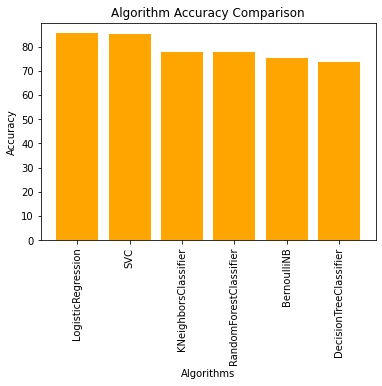

In [25]:
x = acc['Model']
y = acc['Accuracy']*100
plt.bar(x=x, height=y,color="orange")
plt.title("Algorithm Accuracy Comparison")
plt.xticks(rotation=90)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

#<font color="blue">Step 6: Validation on test data set </font>

In [26]:
log = LogisticRegression(max_iter=1000)
log.fit(train_tfid_matrix, y_train)

pred = log.predict(test_tfid_matrix)

In [27]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 490   30  127]
 [  83   77  266]
 [  37   45 2944]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       647
           1       0.51      0.18      0.27       426
           2       0.88      0.97      0.93      3026

    accuracy                           0.86      4099
   macro avg       0.73      0.64      0.66      4099
weighted avg       0.83      0.86      0.83      4099



### <font color="blue"> Confusion Matrix of Logistic Regression </font>

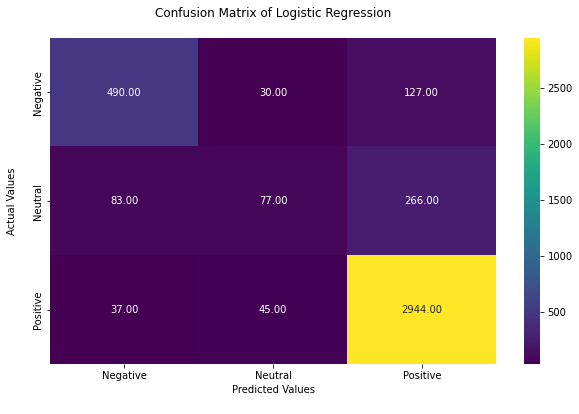

In [42]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt=".2f",cmap="viridis")
#plt.xlabel('Predictions', fontsize=16)
#plt.ylabel('Actuals', fontsize=16)
fx.set_title('Confusion Matrix of Logistic Regression\n');
fx.set_xlabel('Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
fx.yaxis.set_ticklabels(['Negative','Neutral','Positive'])
plt.show()

In [31]:
dec = DecisionTreeClassifier()
dec.fit(train_tfid_matrix, y_train)

pred_dec = dec.predict(test_tfid_matrix)

In [32]:
print(confusion_matrix(y_test, pred_dec))
print(classification_report(y_test, pred_dec))

[[ 351   94  202]
 [  95   81  250]
 [ 224  244 2558]]
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       647
           1       0.19      0.19      0.19       426
           2       0.85      0.85      0.85      3026

    accuracy                           0.73      4099
   macro avg       0.52      0.53      0.52      4099
weighted avg       0.73      0.73      0.73      4099



### <font color="blue"> Confusion Matrix of DecisionTreeClassifier</font>

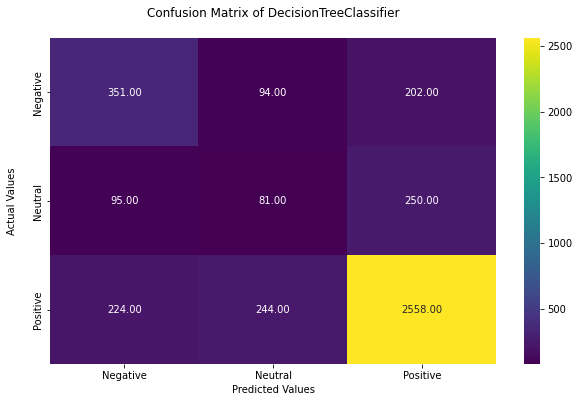

In [43]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_dec), annot=True, fmt=".2f",cmap="viridis")
fx.set_title('Confusion Matrix of DecisionTreeClassifier\n');
fx.set_xlabel('Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
fx.yaxis.set_ticklabels(['Negative','Neutral','Positive'])
plt.show()

In [44]:
random_f = RandomForestClassifier()
random_f.fit(train_tfid_matrix, y_train)

pred_random_f = random_f.predict(test_tfid_matrix)

In [45]:
print(confusion_matrix(y_test, pred_random_f))
print(classification_report(y_test, pred_random_f))

[[ 202    0  445]
 [   8    1  417]
 [   4    0 3022]]
              precision    recall  f1-score   support

           0       0.94      0.31      0.47       647
           1       1.00      0.00      0.00       426
           2       0.78      1.00      0.87      3026

    accuracy                           0.79      4099
   macro avg       0.91      0.44      0.45      4099
weighted avg       0.83      0.79      0.72      4099



### <font color="blue"> Confusion Matrix of Random Forest Classifier</font>

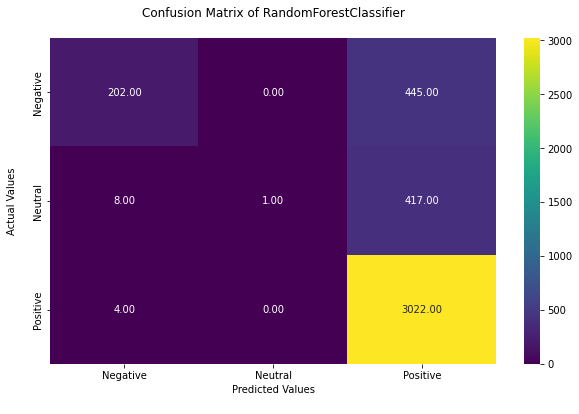

In [47]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_random_f), annot=True, fmt=".2f",cmap="viridis")
fx.set_title('Confusion Matrix of RandomForestClassifier\n');
fx.set_xlabel('Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
fx.yaxis.set_ticklabels(['Negative','Neutral','Positive'])
plt.show()

In [48]:
knn = KNeighborsClassifier()
knn.fit(train_tfid_matrix, y_train)

pred_knn = knn.predict(test_tfid_matrix)

In [49]:
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

[[ 281   45  321]
 [  52   39  335]
 [  80   90 2856]]
              precision    recall  f1-score   support

           0       0.68      0.43      0.53       647
           1       0.22      0.09      0.13       426
           2       0.81      0.94      0.87      3026

    accuracy                           0.77      4099
   macro avg       0.57      0.49      0.51      4099
weighted avg       0.73      0.77      0.74      4099



### <font color="blue"> Confusion Matrix of KNN </font>

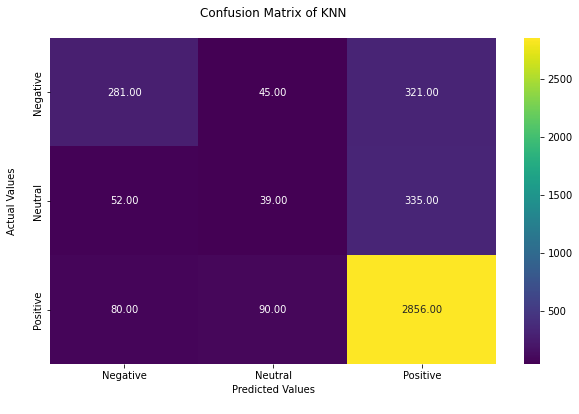

In [51]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_knn), annot=True, fmt=".2f",cmap="viridis")
fx.set_title('Confusion Matrix of KNN\n');
fx.set_xlabel('Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
fx.yaxis.set_ticklabels(['Negative','Neutral','Positive'])
plt.show()

In [52]:
svc = SVC(probability=True)
svc.fit(train_tfid_matrix, y_train)

pred_svc = svc.predict(test_tfid_matrix)

In [53]:
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

[[ 495   18  134]
 [  85   47  294]
 [  36   19 2971]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       647
           1       0.56      0.11      0.18       426
           2       0.87      0.98      0.92      3026

    accuracy                           0.86      4099
   macro avg       0.75      0.62      0.63      4099
weighted avg       0.83      0.86      0.83      4099



### <font color="blue"> Confusion Matrix of SVC </font>

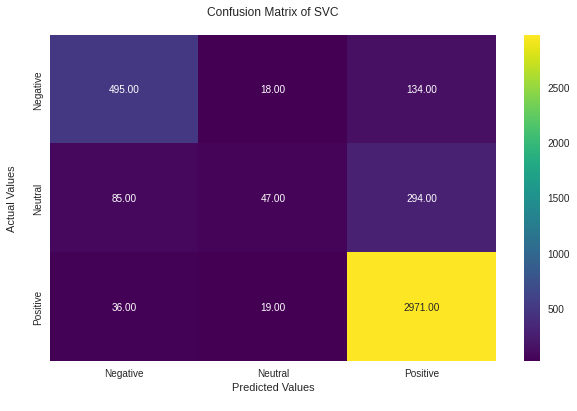

In [75]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_svc), annot=True, fmt=".2f",cmap="viridis")
fx.set_title('Confusion Matrix of SVC\n');
fx.set_xlabel('Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
fx.yaxis.set_ticklabels(['Negative','Neutral','Positive'])
plt.show()

In [55]:
bnb = BernoulliNB()
bnb.fit(train_tfid_matrix, y_train)

pred_bnb = bnb.predict(test_tfid_matrix)

In [56]:
print(confusion_matrix(y_test, pred_bnb))
print(classification_report(y_test, pred_bnb))

[[ 252   11  384]
 [  42   14  370]
 [  48  112 2866]]
              precision    recall  f1-score   support

           0       0.74      0.39      0.51       647
           1       0.10      0.03      0.05       426
           2       0.79      0.95      0.86      3026

    accuracy                           0.76      4099
   macro avg       0.54      0.46      0.47      4099
weighted avg       0.71      0.76      0.72      4099



### <font color="blue"> Confusion Matrix of BernoulliNB </font>

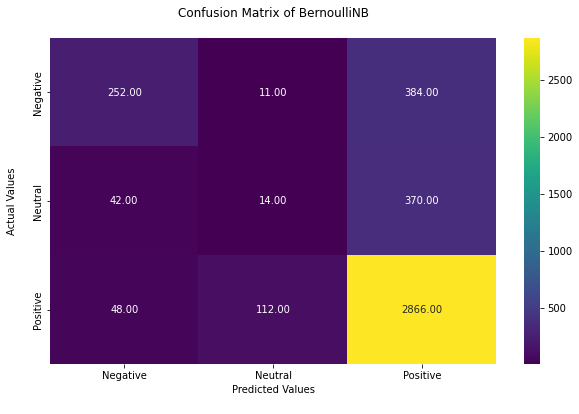

In [58]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_bnb), annot=True, fmt=".2f",cmap="viridis")
fx.set_title('Confusion Matrix of BernoulliNB\n');
fx.set_xlabel('Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
fx.yaxis.set_ticklabels(['Negative','Neutral','Positive'])
plt.show()

In [59]:
from sklearn.metrics import roc_auc_score

# Generate class membership probabilities
y_preb_probs = dec.predict_proba(test_tfid_matrix)

dec_auc_curve=roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr")
dec_auc_curve=dec_auc_curve*100
print("Decision Trees:",round(dec_auc_curve,2))




Decision Trees: 69.72


In [60]:
from sklearn.metrics import roc_auc_score

# Generate class membership probabilities
y_preb_prob_bnb = bnb.predict_proba(test_tfid_matrix)

bnb_auc_curve=roc_auc_score(y_test, y_preb_prob_bnb, average="weighted", multi_class="ovr")
bnb_auc_curve=bnb_auc_curve*100
print("BNB:",round(bnb_auc_curve,2))

BNB: 83.82


In [61]:

# Generate class membership probabilities
y_preb_probs_log = log.predict_proba(test_tfid_matrix)

log_auc_curve=roc_auc_score(y_test, y_preb_probs_log, average="weighted", multi_class="ovr")
log_auc_curve=log_auc_curve*100
print("Logistic Regression:",round(log_auc_curve,2))

Logistic Regression: 94.55


In [62]:
# Generate class membership probabilities
y_preb_probs_knn = knn.predict_proba(test_tfid_matrix)

knn_auc_curve=roc_auc_score(y_test, y_preb_probs_knn, average="weighted", multi_class="ovr")
knn_auc_curve=knn_auc_curve*100
print("KNN:",round(knn_auc_curve,2))

KNN: 77.16


In [63]:
y_preb_probs_svc = svc.predict_proba(test_tfid_matrix)

svc_auc_curve=roc_auc_score(y_test, y_preb_probs_svc, average="weighted", multi_class="ovr")
svc_auc_curve=svc_auc_curve*100
print("SVC:",round(svc_auc_curve,2))

SVC: 94.34


In [64]:
# Generate class membership probabilities
y_preb_probs_ran = random_f.predict_proba(test_tfid_matrix)

ran_auc_curve=roc_auc_score(y_test, y_preb_probs_ran, average="weighted", multi_class="ovr")
ran_auc_curve=ran_auc_curve*100
print("Random Forest:",round(ran_auc_curve,2))

Random Forest: 90.77


In [65]:
y_preb_probs_svc = svc.predict_proba(test_tfid_matrix)

svc_auc_curve=roc_auc_score(y_test, y_preb_probs_svc, average="weighted", multi_class="ovr")
svc_auc_curve=svc_auc_curve*100
print("SVC:",round(svc_auc_curve,2))

SVC: 94.34


In [66]:
y_preb_probs_log[:,1]

array([0.10655744, 0.10433916, 0.03624428, ..., 0.1950918 , 0.19119079,
       0.00450197])

# <font color="blue"> Step 7: Metric Evaluation </font>

###<font color="blue">
1. ROC Curve Comparision of different models
2. Table chart comparision of different metrics and different models
3.Bar Chart Visualisation of different metrics and different model

In [67]:
from sklearn.metrics import roc_curve

In [68]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_preb_probs_log[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_preb_probs_knn[:,1], pos_label=1)
fpr3,tpr3,thresh3=roc_curve(y_test, y_preb_probs_ran[:,1], pos_label=1)
fpr4,tpr4,thresh4=roc_curve(y_test, y_preb_prob_bnb[:,1], pos_label=1)
fpr5,tpr5,thresh5=roc_curve(y_test, y_preb_probs[:,1], pos_label=1)
fpr6,tpr6,thresh5=roc_curve(y_test, y_preb_probs_svc[:,1], pos_label=1)


In [69]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [70]:
p_fpr

array([0., 1.])

In [71]:
p_tpr

array([0., 1.])

## <font color="blue"> ROC Curve Comparision of different models </font>

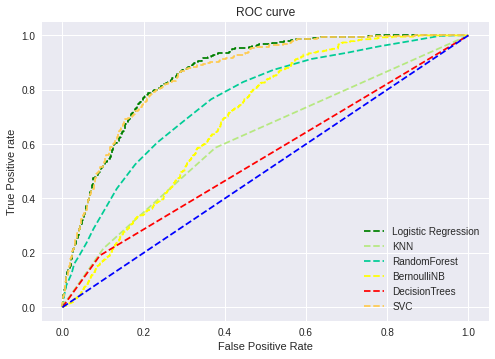

In [72]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='#B6E880', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='#00CC96', label='RandomForest')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='BernoulliNB')
plt.plot(fpr5, tpr5, linestyle='--',color='red', label='DecisionTrees')
plt.plot(fpr6, tpr6, linestyle='--',color='#FECB52', label='SVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=500)
plt.show();

## <font color="blue"> AUC Comparision of different models </font>

In [73]:
AUC_Comparison = {'Model' : [],
              'AUC' : [],
              }

In [76]:
AUC_Comparison['Model'].append('DecisionTreeClassifier')
AUC_Comparison['AUC'].append(dec_auc_curve)
AUC_Comparison['Model'].append('Logistic Regression')
AUC_Comparison['AUC'].append(log_auc_curve)
AUC_Comparison['Model'].append('SVC')
AUC_Comparison['AUC'].append(svc_auc_curve)
AUC_Comparison['Model'].append('KNN')
AUC_Comparison['AUC'].append(knn_auc_curve)
AUC_Comparison['Model'].append('Random Forest')
AUC_Comparison['AUC'].append(ran_auc_curve)
AUC_Comparison['Model'].append('BNB')
AUC_Comparison['AUC'].append(bnb_auc_curve)

In [80]:
AUC_Comparison=pd.DataFrame(AUC_Comparison)
AUC_Comparison

,Model,AUC
0,DecisionTreeClassifier,69.715905
1,Logistic Regression,94.552614
2,SVC,94.341241
3,KNN,77.163475
4,Random Forest,90.771353
5,BNB,83.824200


In [83]:
AUC_Comparison=AUC_Comparison.sort_values('AUC',ascending=False)
AUC_Comparison

,Model,AUC
1,Logistic Regression,94.552614
2,SVC,94.341241
4,Random Forest,90.771353
5,BNB,83.824200
3,KNN,77.163475
0,DecisionTreeClassifier,69.715905


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
Model_Performance_Comparison = {'Model' : [],
              'Accuracy Score' : [],
              'Precision Score' : [],
              'Recall Score' : [],
              'f1 Score' : []}

In [101]:
Model_Performance_Comparison['Model'].append('LogisticRegression')
Model_Performance_Comparison['Accuracy Score'].append(0.86)
Model_Performance_Comparison['Precision Score'].append(precision_score(y_test, pred, average='macro'))
Model_Performance_Comparison['Recall Score'].append(recall_score(y_test, pred, average='macro'))
Model_Performance_Comparison['f1 Score'].append(f1_score(y_test, pred, average='macro'))

In [102]:
Model_Performance_Comparison

{'Model': ['LogisticRegression'],
 'Accuracy Score': [0.86],
 'Precision Score': [0.7306957277969213],
 'Recall Score': [0.6369980901248335],
 'f1 Score': [0.6571399044359606]}

In [103]:
Model_Performance_Comparison['Model'].append('SVC')
Model_Performance_Comparison['Accuracy Score'].append(0.86)
Model_Performance_Comparison['Precision Score'].append(precision_score(y_test, pred_svc, average='macro'))
Model_Performance_Comparison['Recall Score'].append(recall_score(y_test, pred_svc, average='macro'))
Model_Performance_Comparison['f1 Score'].append(f1_score(y_test, pred_svc, average='macro'))

In [104]:
Model_Performance_Comparison

{'Model': ['LogisticRegression', 'SVC'],
 'Accuracy Score': [0.86, 0.86],
 'Precision Score': [0.7306957277969213, 0.7457252833466427],
 'Recall Score': [0.6369980901248335, 0.6190741268751281],
 'f1 Score': [0.6571399044359606, 0.6309955364038521]}

In [105]:
Model_Performance_Comparison['Model'].append('RandomForest')
Model_Performance_Comparison['Accuracy Score'].append(0.79)
Model_Performance_Comparison['Precision Score'].append(precision_score(y_test, pred_random_f, average='macro'))
Model_Performance_Comparison['Recall Score'].append(recall_score(y_test, pred_random_f, average='macro'))
Model_Performance_Comparison['f1 Score'].append(f1_score(y_test, pred_random_f, average='macro'))

In [106]:
Model_Performance_Comparison

{'Model': ['LogisticRegression', 'SVC', 'RandomForest'],
 'Accuracy Score': [0.86, 0.86, 0.79],
 'Precision Score': [0.7306957277969213,
  0.7457252833466427,
  0.9073296951147128],
 'Recall Score': [0.6369980901248335, 0.6190741268751281, 0.4377452472340999],
 'f1 Score': [0.6571399044359606, 0.6309955364038521, 0.4495266869247523]}

In [107]:
Model_Performance_Comparison['Model'].append('K Nearest Neighbors')
Model_Performance_Comparison['Accuracy Score'].append(0.77)
Model_Performance_Comparison['Precision Score'].append(precision_score(y_test, pred_knn, average='macro'))
Model_Performance_Comparison['Recall Score'].append(recall_score(y_test, pred_knn, average='macro'))
Model_Performance_Comparison['f1 Score'].append(f1_score(y_test, pred_knn, average='macro'))

In [108]:
Model_Performance_Comparison

{'Model': ['LogisticRegression', 'SVC', 'RandomForest', 'K Nearest Neighbors'],
 'Accuracy Score': [0.86, 0.86, 0.79, 0.77],
 'Precision Score': [0.7306957277969213,
  0.7457252833466427,
  0.9073296951147128,
  0.572579061779319],
 'Recall Score': [0.6369980901248335,
  0.6190741268751281,
  0.4377452472340999,
  0.48989391023155876],
 'f1 Score': [0.6571399044359606,
  0.6309955364038521,
  0.4495266869247523,
  0.511283449826943]}

In [109]:
Model_Performance_Comparison['Model'].append('BernoulliNB')
Model_Performance_Comparison['Accuracy Score'].append(0.76)
Model_Performance_Comparison['Precision Score'].append(precision_score(y_test, pred_bnb, average='macro'))
Model_Performance_Comparison['Recall Score'].append(recall_score(y_test, pred_bnb, average='macro'))
Model_Performance_Comparison['f1 Score'].append(f1_score(y_test, pred_bnb, average='macro'))

In [110]:
Model_Performance_Comparison['Model'].append('DecisionTrees')
Model_Performance_Comparison['Accuracy Score'].append(0.73)
Model_Performance_Comparison['Precision Score'].append(precision_score(y_test, pred_dec, average='macro'))
Model_Performance_Comparison['Recall Score'].append(recall_score(y_test, pred_dec, average='macro'))
Model_Performance_Comparison['f1 Score'].append(f1_score(y_test, pred_dec, average='macro'))

## <font color="blue"> Table chart comparision of different metrics and different models </font>

In [111]:
pd.DataFrame(Model_Performance_Comparison)

,Model,Accuracy Score,Precision Score,Recall Score,f1 Score
0,LogisticRegression,0.86,0.730696,0.636998,0.657140
1,SVC,0.86,0.745725,0.619074,0.630996
2,RandomForest,0.79,0.907330,0.437745,0.449527
3,K Nearest Neighbors,0.77,0.572579,0.489894,0.511283
4,BernoulliNB,0.76,0.543582,0.456493,0.473938
5,DecisionTrees,0.73,0.522344,0.525995,0.524109


## <font color="blue"> Bar Chart Visualisation of different metrics and different models </font>

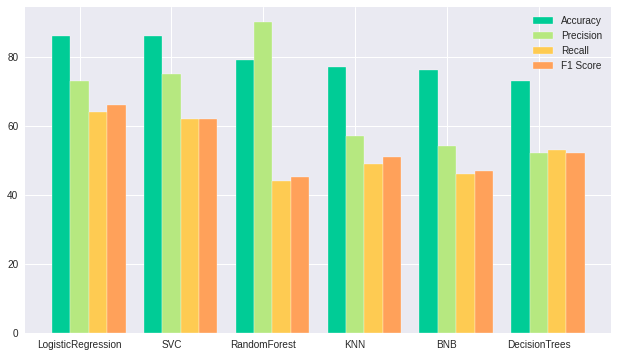

In [112]:
# set width of bar
barWidth = 0.20
plt.rcParams["figure.figsize"] = (10.5,6)
 
# set height of bar
accuracy_bar = [86,86,79,77,76,73]
precision_bar = [73,75,90,57,54,52]
recall_bar = [64,62,44,49,46,53]
f1score_bar=[66,62,45,51,47,52]
 
# Set position of bar on X axis
r1 = np.arange(len(accuracy_bar))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4= [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, accuracy_bar, color='#00CC96', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, precision_bar, color='#B6E880', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, recall_bar, color='#FECB52', width=barWidth, edgecolor='white', label='Recall')
plt.bar(r4, f1score_bar, color='#FFA15A', width=barWidth, edgecolor='white', label='F1 Score')
 
# Add xticks on the middle of the group bars
#plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(accuracy_bar))], ['LogisticRegression', 'SVC', 'RandomForest','KNN', 'BNB','DecisionTrees'])
 
# Create legend & Show graphic
plt.legend()
plt.show()